# Projeto para detecção de diabetes - SEMANTIX
### O que é a diabetes?
Diabetes é uma síndrome metabólica de origem múltipla, caracterizada pela falta de insulina e/ou pela incapacidade da insulina de exercer adequadamente seus efeitos. Isso resulta em altas taxas de açúcar no sangue (hiperglicemia) de forma permanente. A insulina, produzida pelo pâncreas, é responsável pela manutenção do metabolismo da glicose, permitindo que o organismo tenha energia para funcionar.

O tratamento da diabetes envolve mudanças no estilo de vida, como a adoção de uma dieta saudável e a prática de exercícios físicos. Dependendo do caso, também podem ser necessários medicamentos, como antidiabéticos orais ou insulina.

Para prevenir o diabetes, é importante:

- Manter um peso adequado
- Não fumar
- Controlar a pressão arterial
- Evitar medicamentos que possam prejudicar o pâncreas
- Praticar atividade física regularmente


![img](https://angioclinicabrasilia.com/wp-content/uploads/2023/09/relacao-entre-diabetes-e-doencas-vasculares.jpg)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import anderson
from scipy.stats import chi2_contingency
!pip install pycaret[full]

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Erik-Henrique/Analise_Diabetes_Semantix/refs/heads/main/diabetes_prediction_dataset.csv')

### Variável resposta e variáveis explicativas

In [4]:
df.dtypes

,0
genero,object
idade,float64
hipertenso,int64
problema_coracao,int64
fumante,object
imc,float64
nivel_hemoglobinaA1c,float64
nivel_glicose_sangue,int64
diabete,int64


Temos duas variáveis que contêm dados do tipo string e sete variáveis que contêm dados numéricos

#### Verficando valores nulos e duplicados

In [5]:
df.isna().sum()

,0
genero,0
idade,0
hipertenso,0
problema_coracao,0
fumante,0
imc,0
nivel_hemoglobinaA1c,0
nivel_glicose_sangue,0
diabete,0


Não há valores nulos no DataFrame

In [6]:
df.shape

(100000, 9)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(96146, 9)

Podemos notar que havia alguns valores duplicados no DataFrame, os quais foram eliminados.

#### Distribuição das variáveis numéricas

In [9]:
df.describe()

,idade,hipertenso,problema_coracao,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,diabete
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Percepções sobre as variáveis:

IDADE:

- O valor mínimo parece ser um outlier, uma vez que não faz sentido analisar se um recém-nascido tem diabetes.
- A média é de quase 42 anos, com um desvio padrão de 22, o que indica uma grande variabilidade nos dados, condizente com as faixas de idade observadas nas análises de quartis.

HIPERTENSÃO & DIABETES:

- As médias e os desvios padrões são semelhantes (0,7 e 0,8 para hipertensão; 0,26 e 0,28 para diabetes), o que demonstra que a maior parte das pessoas na base não é hipertensa nem possui diabetes. Essa observação é confirmada pela análise dos quartis, onde pelo menos 75% das pessoas não se enquadram nesses grupos.

PROBLEMAS NO CORAÇÃO:

- Segue a mesma lógica das variáveis de hipertensão e diabetes, com média de 0,4 e desvio padrão de 0,19, indicando que a maior parte das pessoas também não tem problemas cardíacos.

IMC:

- Apesar de não ser uma métrica muito confiável quando analisada isoladamente, em conjunto pode ser um bom parâmetro.
Os valores mínimo e máximo estão muito discrepantes do que costuma ser observado, o que pode indicar algum tipo de erro na coleta de dados, necessitando de tratamento.
- A média está em um valor condizente; mesmo com outliers, os valores não parecem afetar significativamente, uma vez que a média é praticamente a mesma do quartil que representa a mediana da base. O desvio padrão mostra que a maioria dos valores está dentro do esperado (geralmente entre 19 e 40).
- A divisão entre os quartis também indica que os valores estão equilibrados, apesar da presença de outliers.

HEMOGLOBINA A1c:

- A média está em valores condizentes com os encontrados na base, e o desvio padrão mantém os valores dentro dos níveis esperados. Os valores mínimo e máximo também estão dentro da faixa esperada (entre 4 e 14), sendo que valores acima de 9 já são preocupantes, assim como o limite de 14.
- A média é semelhante à análise dos quartis.

NÍVEL DE GLICOSE NO SANGUE:

- O nível médio está condizente com a análise dos quartis e próximo aos 50% da base.
- Os valores mínimo e máximo estão dentro da faixa esperada, e o desvio padrão é adequado, considerando que os valores extremos se distanciam de forma significativa.

##### Variável resposta (Diabete)

In [10]:
df.diabete.value_counts(normalize=True)*100

,proportion
diabete,
0,91.178
1,8.822


Observamos que a variável resposta está extremamente desbalanceada, representando apenas 8,5% dos nossos dados, o que requer tratamento.

#### Distribuição das variáveis qualitativas

##### Gênero

In [11]:
df.genero.value_counts(normalize=True)*100

,proportion
genero,
Female,58.412206
Male,41.569072
Other,0.018722


In [12]:
df.genero.value_counts()

,count
genero,
Female,56161
Male,39967
Other,18


Podemos observar que a maioria dos pacientes no DataFrame é do sexo feminino, representando cerca de 58% dos dados. No entanto, há registros marcados como 'Other'; irei analisar esses dados para decidir se devo removê-los ou não do modelo.

In [13]:
df[df['diabete']==1].genero.value_counts(normalize=True)*100

,proportion
genero,
Female,52.428672
Male,47.571328


In [14]:
df[df['diabete']==1].genero.value_counts()

,count
genero,
Female,4447
Male,4035


In [15]:
df[df['diabete']==0].genero.value_counts(normalize=True)*100

,proportion
genero,
Female,58.991148
Male,40.988319
Other,0.020533


In [16]:
df[df['diabete']==0].genero.value_counts()

,count
genero,
Female,51714
Male,35932
Other,18


Como o gênero classificado como 'Other' está presente apenas na classe majoritária do DataFrame, onde não há pacientes com diabetes, decidi remover esses dados do DataFrame.

In [17]:
df.drop(df[df['genero']=="Other"].index, inplace=True)

In [18]:
df.genero = df.genero.map({'Female': 0, 'Male': 1})

##### Fumante

In [19]:
df.fumante.value_counts(normalize=True)*100

,proportion
fumante,
never,35.780418
No Info,34.205434
former,9.673560
current,9.567452
not current,6.615138
ever,4.157998


In [20]:
df.fumante.value_counts()

,count
fumante,
never,34395
No Info,32881
former,9299
current,9197
not current,6359
ever,3997


#### Antes de realizar as análises gráficas, irei redimensionar o DataFrame, reduzindo a quantidade de dados de pessoas não diabeticas de forma aleatoria para igualar a quantidade de pessoas diabeticas.

In [21]:
under = RandomUnderSampler(random_state=0)
x_under, y_under = under.fit_resample(df.drop(columns='diabete'), df['diabete'])
df_under = pd.concat([x_under, y_under], axis=1)
df_under.diabete.value_counts()

,count
diabete,
0,8482
1,8482


### Análises gráficas

##### Glicose

<Axes: xlabel='nivel_glicose_sangue', ylabel='count'>

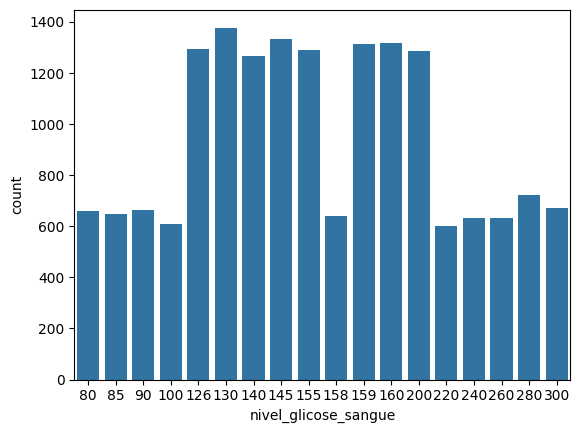

In [22]:
sns.countplot(data=df_under, x='nivel_glicose_sangue')

<Axes: xlabel='nivel_glicose_sangue', ylabel='percent'>

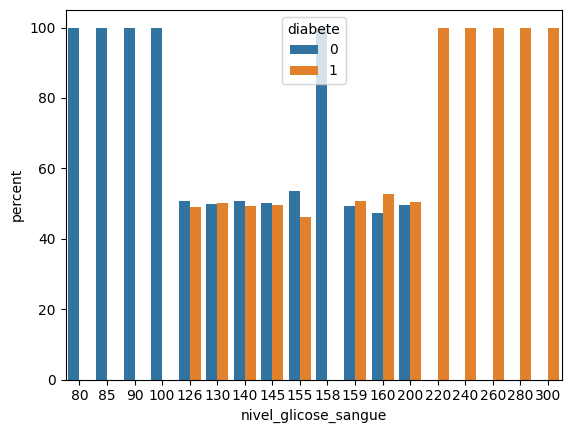

In [23]:
total = df_under.groupby(['nivel_glicose_sangue', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('nivel_glicose_sangue')['count'].transform('sum') * 100

sns.barplot(data=total, x='nivel_glicose_sangue', y='percent', hue='diabete')


Notamos uma clara concentração dos dados entre 101 e 200, com o restante das ocorrências bem distribuídas entre os outros valores.
- Notamos, ao analisar percentualmente, que os valores mais repetidos têm um equilíbrio entre diabéticos e não diabéticos. No entanto, os demais dados são bem discriminados: 100% dos pacientes com Glicose acima de 200 são diabéticos, enquanto todos com Glicose menor que 101 não são.
- Notamos que essa variável é altamente discriminante, o que indica que será muito importante para o modelo.

##### Nivel de Hemoglobina A1c

<Axes: xlabel='nivel_hemoglobinaA1c', ylabel='count'>

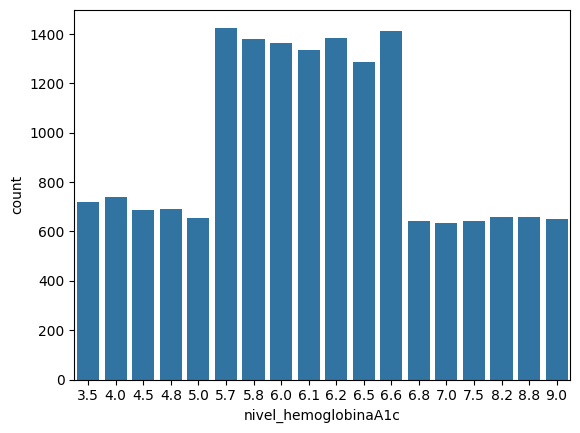

In [24]:
sns.countplot(data=df_under, x='nivel_hemoglobinaA1c')

<Axes: xlabel='nivel_hemoglobinaA1c', ylabel='percent'>

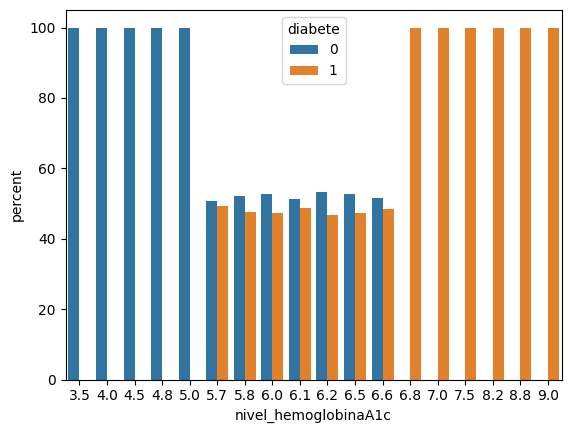

In [25]:
total = df_under.groupby(['nivel_hemoglobinaA1c', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('nivel_hemoglobinaA1c')['count'].transform('sum') * 100

sns.barplot(data=total, x='nivel_hemoglobinaA1c', y='percent', hue='diabete')


Notamos uma clara concentração dos dados entre 5,7 e 6,6, com o restante das ocorrências bem distribuídas entre os outros valores.
- Notamos, ao analisar percentualmente, que os valores mais repetidos têm um equilíbrio entre diabéticos e não diabéticos. No entanto, os demais dados são bem discriminados: 100% dos pacientes com A1c acima de 6,7 são diabéticos, enquanto todos com A1c menor que 5 não são.
- Notamos que essa variável é altamente discriminante, o que indica que será muito importante para o modelo.


##### Problemas no coração

<Axes: xlabel='problema_coracao', ylabel='count'>

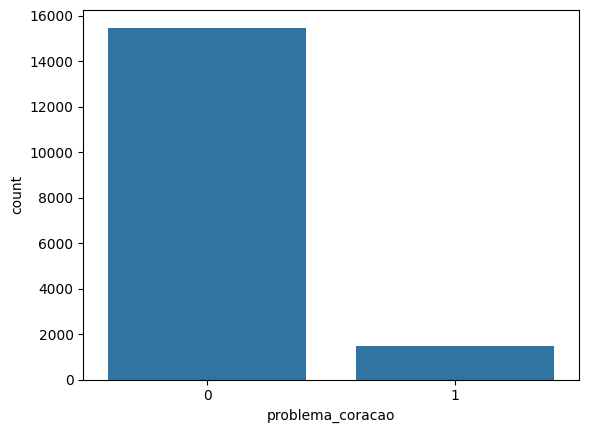

In [26]:
sns.countplot(data=df_under, x='problema_coracao')

<Axes: xlabel='problema_coracao', ylabel='percent'>

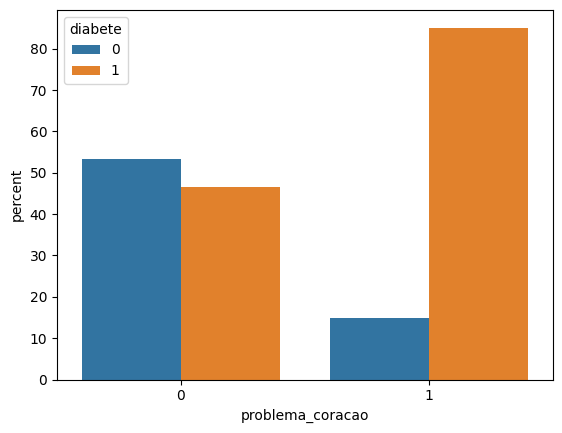

In [27]:
total = df_under.groupby(['problema_coracao', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('problema_coracao')['count'].transform('sum') * 100

sns.barplot(data=total, x='problema_coracao', y='percent', hue='diabete')


Notamos uma diferença significativa na quantidade de pacientes com problemas no coração.
- Os problemas cardiacos podem ser um agravante para o desenvolvimento do diabetes ou serem causados por ele. Podemos notar a diferença percentual entre os pacientes com problemas cardiacos, onde cerca de 80% são diabéticos.


##### Hipertenso

<Axes: xlabel='hipertenso', ylabel='count'>

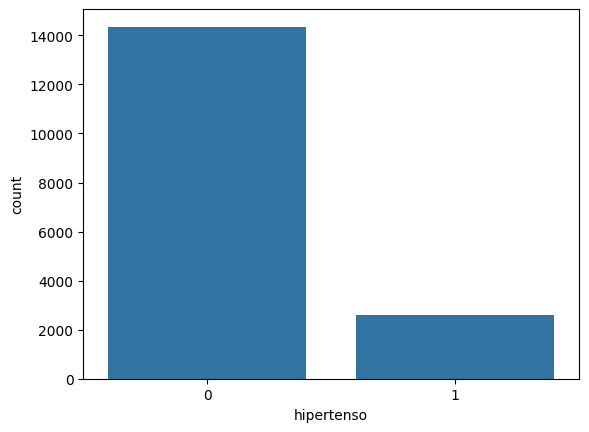

In [28]:
sns.countplot(data=df_under, x='hipertenso')

<Axes: xlabel='hipertenso', ylabel='percent'>

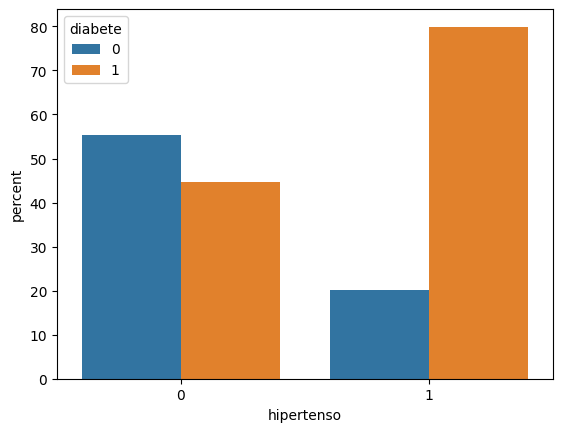

In [29]:
total = df_under.groupby(['hipertenso', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('hipertenso')['count'].transform('sum') * 100

sns.barplot(data=total, x='hipertenso', y='percent', hue='diabete')


Notamos uma diferença significativa na quantidade de pacientes com hipertensão.
- A hipertensão pode ser um agravante para o desenvolvimento do diabetes ou ser causada por ele. Podemos notar a diferença percentual entre os pacientes hipertensos, onde cerca de 80% são diabéticos.


##### Gênero

<Axes: xlabel='genero', ylabel='count'>

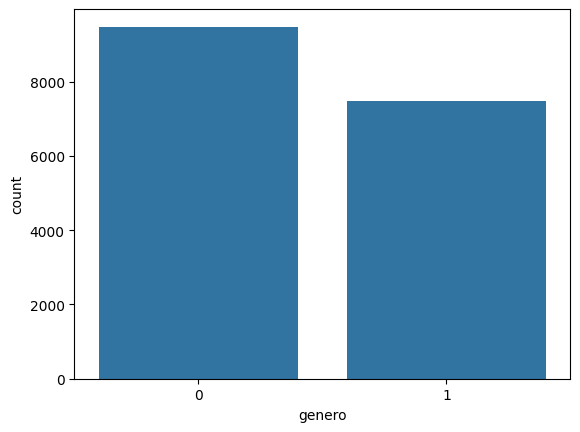

In [30]:
sns.countplot(data=df_under, x='genero')

<Axes: xlabel='genero', ylabel='percent'>

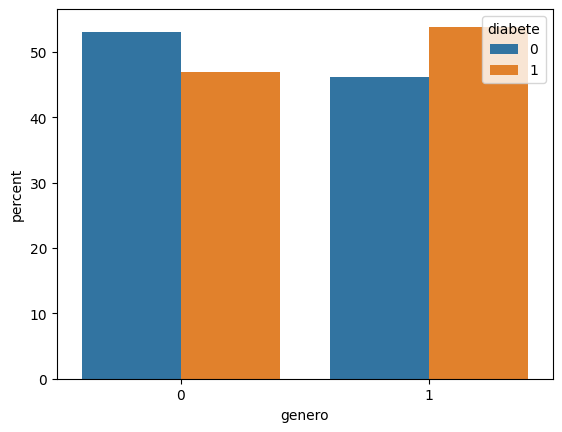

In [31]:
total = df_under.groupby(['genero', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('genero')['count'].transform('sum') * 100

sns.barplot(data=total, x='genero', y='percent', hue='diabete')

Notamos que há mais mulheres do que homens no DataFrame.
- O gênero não é um fator determinante para o desenvolvimento de diabetes; outros fatores, como percentual de gordura corporal, prática de atividades físicas e alimentação, são mais relevantes.
- Neste DataFrame, os homens são, percentualmente, mais propensos a ter diabetes do que as mulheres.


##### Idade

<Axes: xlabel='idade', ylabel='Count'>

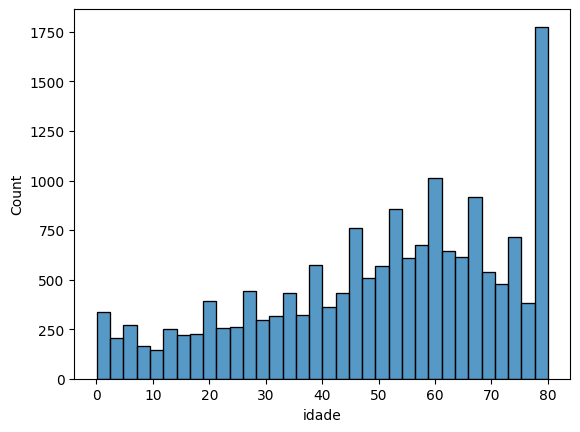

In [32]:
sns.histplot(data=df_under, x='idade')

<Axes: xlabel='idade', ylabel='percent'>

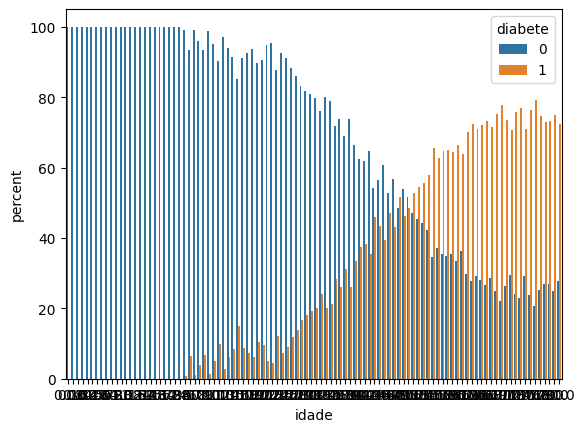

In [33]:
total = df_under.groupby(['idade', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('idade')['count'].transform('sum') * 100

sns.barplot(data=total, x='idade', y='percent', hue='diabete')


Notamos que a idade dos pacientes analisados apresenta grande variação, concentrando-se mais após os 40 anos.
- Podemos ver pela análise percentual que, quanto maior a idade, maior é a quantidade de pacientes com diabetes percentualmente, corroborando o fato de a doença se manifestar com mais frequência após os 40 anos.


##### Fumante

<Axes: xlabel='fumante', ylabel='count'>

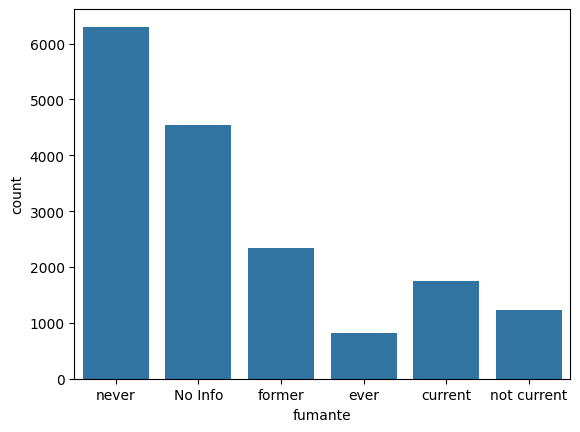

In [34]:
sns.countplot(data=df_under, x='fumante')

<Axes: xlabel='fumante', ylabel='percent'>

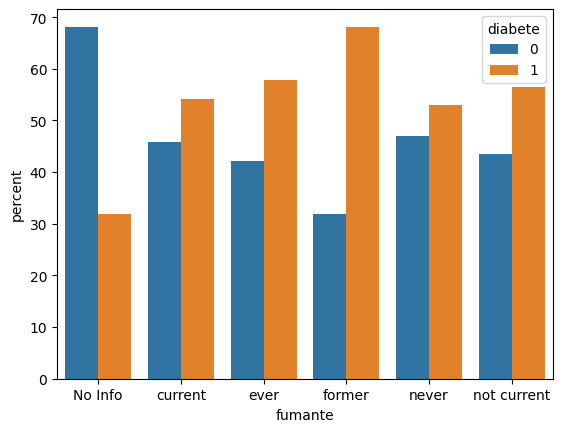

In [35]:
total = df_under.groupby(['fumante', 'diabete']).size().reset_index(name='count')
total['percent'] = total['count'] / total.groupby('fumante')['count'].transform('sum') * 100

sns.barplot(data=total, x='fumante', y='percent', hue='diabete')


Notamos que há mais pacientes que nunca fumaram, seguidos por aqueles que não forneceram essa informação de forma precisa.
- Percebemos na análise percentual que os pacientes que não informaram seu status de tabagismo (fumante ou não) apresentam o menor percentual de diabéticos.
- Percebemos também que todas as categorias de pacientes que fumam ou já fumaram possuem maior percentual de diabéticos, além de apresentarem um percentual maior de diabéticos em comparação com aqueles que nunca fumaram.

##### IMC

(array([1.600e+01, 1.000e+02, 3.570e+02, 4.320e+02, 6.020e+02, 8.430e+02,
        1.115e+03, 1.353e+03, 4.842e+03, 1.382e+03, 1.275e+03, 1.093e+03,
        8.390e+02, 6.980e+02, 5.130e+02, 4.010e+02, 3.100e+02, 2.020e+02,
        1.780e+02, 1.310e+02, 7.700e+01, 5.600e+01, 3.500e+01, 3.800e+01,
        3.100e+01, 1.500e+01, 7.000e+00, 7.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([10.77   , 12.71875, 14.6675 , 16.61625, 18.565  , 20.51375,
        22.4625 , 24.41125, 26.36   , 28.30875, 30.2575 , 32.20625,
        34.155  , 36.10375, 38.0525 , 40.00125, 41.95   , 43.89875,
        45.8475 , 47.79625, 49.745  , 51.69375, 53.6425 , 55.59125,
        57.54   , 59.48875, 61.4375 , 63.38625, 65.335  , 67.28375,
        69.2325 , 71.18125, 73.13   , 75.07875, 77.0275 , 78.97625,
        80.925  , 82.87375, 84.8225 , 86.77125, 88.72   ]),
 <BarContainer object of 40 artist

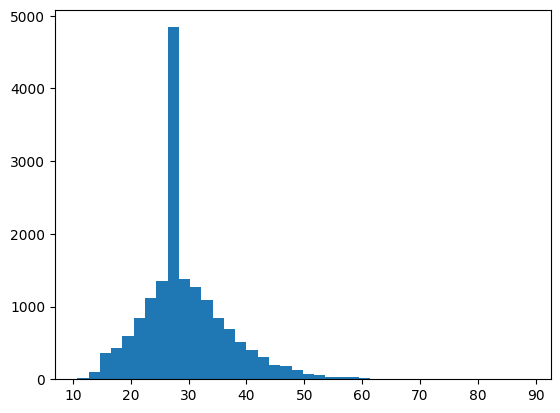

In [36]:
plt.hist(data=df_under, x='imc', bins=40)

Notamos uma grande concentração em um único valor próximo de 30; no entanto, o restante dos valores também se concentra entre 25 e 35.
- Isso nos mostra que a grande maioria dos pacientes analisados apresenta um valor de IMC que varia entre bom e início de alerta, uma vez que até 27 o valor é considerado normal, enquanto acima de 30 já se torna preocupante.


### Testes de Associação

#### Hemoglobina A1c
A dosagem da hemoglobina glicada, também chamada de hemoglobina glicosilada, hemoglobina A1c ou simplesmente HbA1c, é um exame de sangue muito utilizado para o acompanhamento dos pacientes diabéticos, por ser ele uma forma eficaz de avaliar os níveis médios da glicose sanguínea nos últimos 2 ou 3 meses.
## Os valores de referência são:
- 4 -> Baixo
- 5 & 6 -> Excelentes
- 7 & 8 -> Atenção
- 9 ou + -> Perigo

### O que queremos testar com o teste Qi-Quadrado é se níveis de hemoglobina glicada acima de 6 é um fator que faz diferença para o desenvolvimento do Diabetes no DataFrame

In [37]:
df_under['A1c_acima_6'] = df_under['nivel_hemoglobinaA1c'].apply(lambda x: 1 if x > 6 else 0)

In [38]:
# Tabela de contingência entre A1c > 6 e Diabetes
tabela = pd.crosstab(df_under['A1c_acima_6'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre A1c > 6 e diabetes.")
else:
    print("Não há associação significativa entre A1c > 6 e diabetes.")


Estatística Qui-Quadrado: 3164.2671705745415, p-valor: 0.0
Existe associação significativa entre A1c > 6 e diabetes.


O teste confirma o que é esperado pela ciência, que um resultado para o teste de Hemoglobina A1c maior que 6 tem relação com o maior risco de desenvolvimento do diabetes

#### Nível de glicose no sangue
A medição do nível de glicose no sangue é um importante fator de determinação para entender se o paciente é considerado diabetico ou não.
## Os valores de referência são:
- Menor que 70 -> Baixo
- Entre 70 e 100 -> Excelentes
- Entre 101 e 125 -> Atenção
- Acima de 125 -> Perigo

### O que queremos testar com o teste Qi-Quadrado é se níveis de glicose no sangue superiores a 101 pode ser um fator que faz diferença para o desenvolvimento do Diabetes no DataFrame

In [39]:
df_under['glicose_acima_101'] = df_under['nivel_glicose_sangue'].apply(lambda x: 1 if x > 101 else 0)

In [40]:
# Tabela de contingência entre A1c > 6 e Diabetes
tabela = pd.crosstab(df_under['glicose_acima_101'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Glicose > 101 e diabetes.")
else:
    print("Não há associação significativa entre Glicose > 101 e diabetes.")


Estatística Qui-Quadrado: 3039.0152643547663, p-valor: 0.0
Existe associação significativa entre Glicose > 101 e diabetes.


O teste confirma o que é esperado pela ciência, que um resultado para o teste de Glicose no sangue maior que 101 tem relação com o maior risco de desenvolvimento do diabetes

#### Hipertensão
Segundo os especialistas há uma ligação clara entre as duas doenças, onde o aparecimento de uma pode desencadear ou ser fator de risco para a outra.
## Os valores de referência são:
- 1 -> Hipertenso
- 0 -> Não hipertenso

### O que queremos testar com o teste Qi-Quadrado é se pacientes hipertensos tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [41]:
df_under['hiper'] = df_under['hipertenso'].apply(lambda x: 1 if x == 1 else 0)

In [42]:
# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['hiper'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Hipertensão e diabetes.")
else:
    print("Não há associação significativa entre Hipertensão e diabetes.")


Estatística Qui-Quadrado: 1103.3686004194967, p-valor: 6.1198347802097526e-242
Existe associação significativa entre Hipertensão e diabetes.


O teste confirma o esperado, a ligação entre Hipertensão e diabetes

#### Problemas no coração
Segundo os especialistas há uma ligação clara entre as duas doenças, onde o aparecimento de uma pode desencadear ou ser fator de risco para a outra.
## Os valores de referência são:
- 1 -> Tem problemas
- 0 -> Não tem problemas

### O que queremos testar com o teste Qi-Quadrado é se pacientes com problemas no coração tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [43]:
df_under['coracao'] = df_under['problema_coracao'].apply(lambda x: 1 if x == 1 else 0)

In [44]:
# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['coracao'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Problemas no coração e diabetes.")
else:
    print("Não há associação significativa entre Problemas no coração e diabetes.")


Estatística Qui-Quadrado: 802.4239925962172, p-valor: 1.6034022576248457e-176
Existe associação significativa entre Problemas no coração e diabetes.


O teste confirma o esperado, a ligação entre Problemas no coração e diabetes

#### Fumante
Segundo os especialistas há uma ligação clara entre fumar e o desenvolvimento de diabetes.
## Os valores de referência são:
- fumou/fuma -> Já fumou
- nunca_fumou -> Não fumou

### O que queremos testar com o teste Qi-Quadrado é se pacientes que fumam ou já fumaram tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [45]:
conditions = [
    df['fumante'] == 'never',
    df['fumante'] == 'No Info',
    df['fumante'] == 'former',
    df['fumante'] == 'current',
    df['fumante'] == 'not current',
    df['fumante'] == 'ever'
]

choices = [
           'nunca_fumou',
           'sem_info',
           'fumou_fuma',
           'fumou_fuma',
           'fumou_fuma',
           'fumou_fuma'
           ]

df_fumante = df.copy()
df_fumante['fumante_cat'] = np.select(conditions, choices)

In [46]:
df_fumante['fuma'] = df_fumante['fumante'].apply(lambda x: 1 if x == 'former' else 0)
df_fumante['fuma'] = df_fumante['fumante'].apply(lambda x: 1 if x == 'current' else 0)
df_fumante['fuma'] = df_fumante['fumante'].apply(lambda x: 1 if x == 'ever' else 0)
df_fumante['fuma'] = df_fumante['fumante'].apply(lambda x: 1 if x == 'not current' else 0)

In [47]:
# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_fumante['fuma'], df_fumante['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Tabagismo e diabetes.")
else:
    print("Não há associação significativa entre Tabagismo e diabetes.")


Estatística Qui-Quadrado: 34.51128454518808, p-valor: 4.237873000269877e-09
Existe associação significativa entre Tabagismo e diabetes.


O teste confirma o esperado, a ligação entre Tabagismo e diabetes

#### IMC
Segundo os especialistas há uma ligação clara entre o aumento do peso de forma não saudavel e a diabetes, claro que o IMC não é uma metrica boa de se análisar sozinha pois o ganho de peso pode ser de forma saudavel.
## Os valores de referência são:
- Entre 18,5 & 24,9 -> IMC normal
- Entre 25 & 29,9 -> IMC pouco acima
- Maior que 30 -> IMC acima
- Maior que 35 -> IMC muito acima

### O que queremos testar com o teste Qi-Quadrado é se pacientes com peso corporal pouco acima já tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [48]:
df_under['IMC_acima_25'] = df_under['imc'].apply(lambda x: 1 if x > 25 else 0)

In [49]:
# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['IMC_acima_25'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre IMC > 25 e diabetes.")
else:
    print("Não há associação significativa entre IMC > 25 e diabetes.")


Estatística Qui-Quadrado: 1342.9776021732005, p-valor: 5.1725169550073556e-294
Existe associação significativa entre IMC > 25 e diabetes.


O teste confirma o esperado, a ligação entre IMC acima de 30 e diabetes

### Tratando os dados para o modelo

In [50]:
df_under.head()

,genero,idade,hipertenso,problema_coracao,fumante,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,diabete,A1c_acima_6,glicose_acima_101,hiper,coracao,IMC_acima_25
62494,0,50.0,0,0,never,28.15,5.7,155,0,0,1,0,0,1
4090,1,8.0,0,0,No Info,27.32,4.8,145,0,0,1,0,0,1
17652,1,59.0,1,0,former,43.95,6.6,80,0,1,0,1,0,1
959,1,49.0,0,0,No Info,28.60,4.5,130,0,0,1,0,0,1
53522,0,51.0,0,0,ever,37.45,6.2,160,0,1,1,0,0,1


In [51]:
df_under.drop(['A1c_acima_6', 'glicose_acima_101', 'hiper', 'hipertenso', 'coracao','IMC_acima_25'], axis=1,inplace=True)

In [52]:
df_modelos = pd.get_dummies(df_under, columns=['fumante'])
df_modelos.fumante_current = df_modelos.fumante_current.astype(int)
df_modelos.fumante_ever = df_modelos.fumante_ever.astype(int)
df_modelos.fumante_former = df_modelos.fumante_former.astype(int)
df_modelos.fumante_never = df_modelos.fumante_never.astype(int)
df_modelos['fumante_not current'] = df_modelos['fumante_not current'].astype(int)
df_modelos['fumante_No Info'] = df_modelos['fumante_No Info'].astype(int)
df_modelos.head(1)

,genero,idade,problema_coracao,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,diabete,fumante_No Info,fumante_current,fumante_ever,fumante_former,fumante_never,fumante_not current
62494,0,50.0,0,28.15,5.7,155,0,0,0,0,0,1,0


### Criando e testando o modelo ideal com Pycaret

In [53]:
df_py = df_modelos.sample(frac=0.95, random_state=0)
df_teste = df_modelos.drop(df_py.index)
df_py.reset_index(drop=True, inplace=True)
df_teste.reset_index(drop=True, inplace=True)

In [55]:
from pycaret.classification import *

In [56]:
setup(data=df_py, target='diabete', session_id=0)

,Description,Value
0,Session id,0
1,Target,diabete
2,Target type,Binary
3,Original data shape,"(16116, 13)"
4,Transformed data shape,"(16116, 13)"
5,Transformed train set shape,"(11281, 13)"
6,Transformed test set shape,"(4835, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [57]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9098,0.9779,0.9249,0.8980,0.9112,0.8195,0.8200,1.1570
ada,Ada Boost Classifier,0.9079,0.9776,0.9189,0.8994,0.9090,0.8158,0.8161,0.3440
lightgbm,Light Gradient Boosting Machine,0.9072,0.9763,0.9192,0.8979,0.9084,0.8144,0.8147,0.4960
catboost,CatBoost Classifier,0.9047,0.9762,0.9171,0.8953,0.9060,0.8094,0.8098,7.6570
xgboost,Extreme Gradient Boosting,0.9012,0.9741,0.9106,0.8942,0.9022,0.8025,0.8028,0.1690
rf,Random Forest Classifier,0.8966,0.9711,0.9012,0.8933,0.8971,0.7931,0.7933,1.0840
et,Extra Trees Classifier,0.8907,0.9622,0.8974,0.8859,0.8915,0.7814,0.7816,0.9920
lr,Logistic Regression,0.8812,0.9608,0.8796,0.8830,0.8811,0.7624,0.7627,1.4950
lda,Linear Discriminant Analysis,0.8811,0.9598,0.8746,0.8866,0.8804,0.7623,0.7625,0.0570
ridge,Ridge Classifier,0.8810,0.9598,0.8746,0.8864,0.8803,0.7621,0.7623,0.0420


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [58]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [78]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9052,0.9778,0.9168,0.8962,0.9064,0.8104,0.8107
1,0.9184,0.9789,0.9274,0.9113,0.9193,0.8369,0.8370
2,0.9131,0.9813,0.9274,0.9019,0.9145,0.8262,0.8266
3,0.9087,0.9764,0.9097,0.9081,0.9089,0.8174,0.8174
4,0.8954,0.9751,0.9168,0.8795,0.8977,0.7908,0.7915
5,0.9113,0.9759,0.9044,0.9174,0.9109,0.8227,0.8228
6,0.8980,0.9739,0.9043,0.8932,0.8987,0.7961,0.7962
7,0.8918,0.9694,0.9255,0.8671,0.8954,0.7837,0.7855
8,0.8936,0.9721,0.8972,0.8908,0.8940,0.7872,0.7873


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [79]:
print(tuned_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Como o modelo original(não tunado) obteve um resultado melhor, a saida "**print(tuned_model)**" devolveu novamente os parametros do modelo original treinado em "**print(best_model)**"

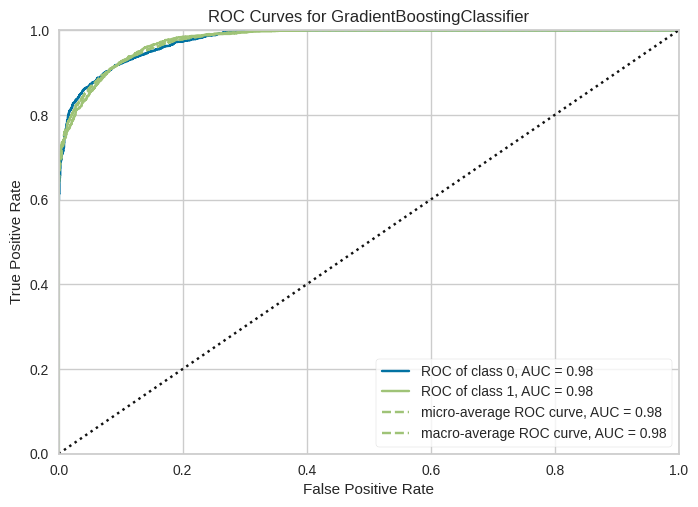

In [65]:
plot_model(best_model, plot = 'auc')

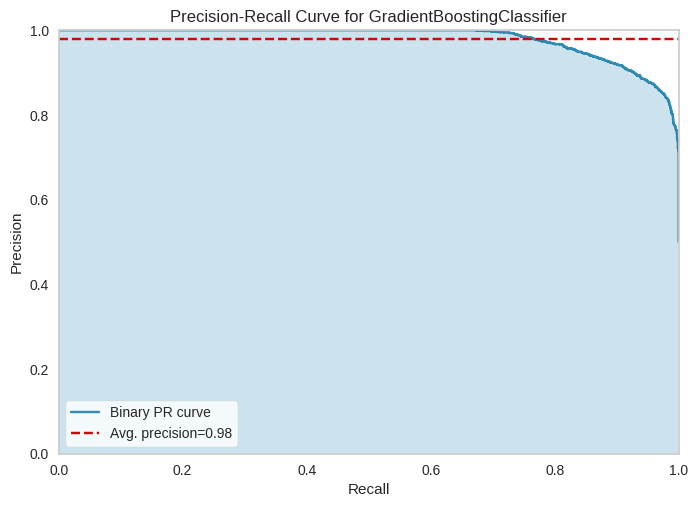

In [66]:
plot_model(best_model, plot = 'pr')

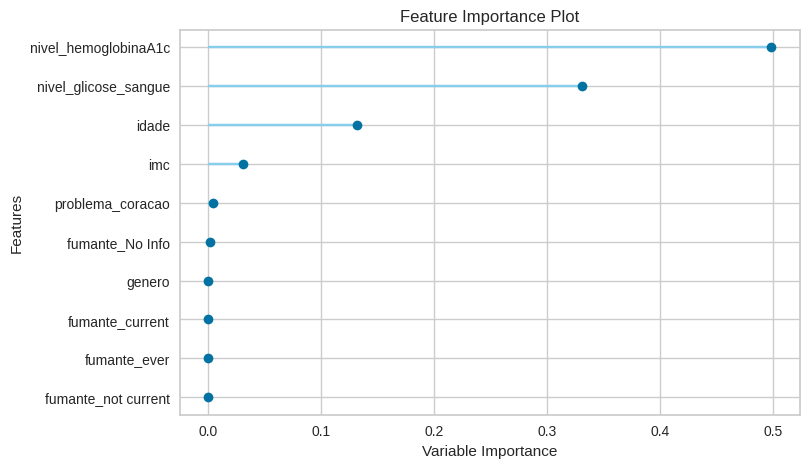

In [67]:
plot_model(best_model, plot = 'feature')

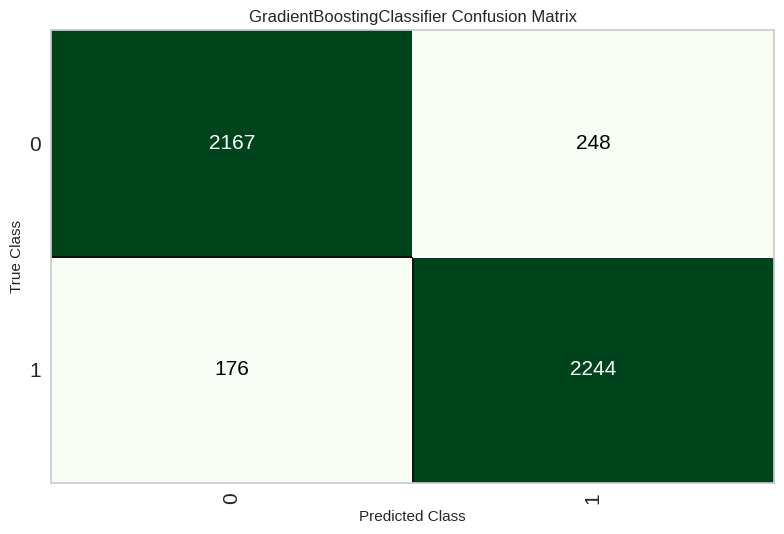

In [68]:
plot_model(best_model, plot = 'confusion_matrix')

In [98]:
model = predict_model(tuned_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9123,0.9789,0.9273,0.9005,0.9137,0.8246,0.8250


#### O modelo generalizou bem na base de validação interna do Pycaret, mantendo ou até melhorando as métricas. Agora, vou testar o modelo final na base de teste separada antes de iniciar o processo de ajuste no Pycaret.

### Criando o modelo final e avaliando as metricas

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score , roc_curve , accuracy_score

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       432
           1       0.96      0.97      0.96       416

    accuracy                           0.96       848
   macro avg       0.96      0.96      0.96       848
weighted avg       0.96      0.96      0.96       848

AUC: 0.9635



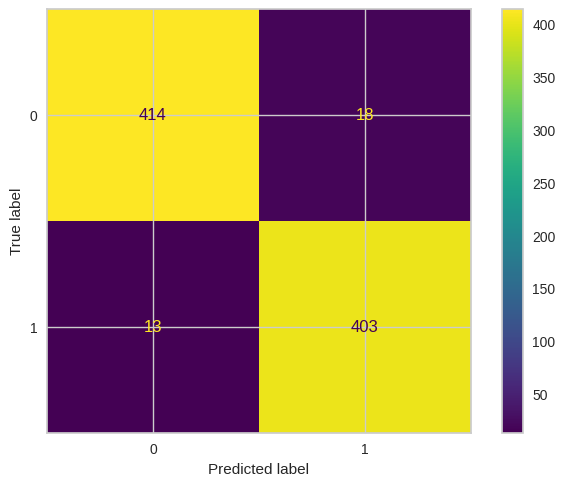

In [96]:
X_teste = df_teste.drop(columns='diabete')
y_teste = df_teste['diabete']

gbm_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbm_model.fit(X_teste, df_teste['diabete'])

ConfusionMatrixDisplay.from_estimator(gbm_model, X_teste, y_teste)
print(classification_report(y_teste, gbm_model.predict(X_teste)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, gbm_model.predict(X_teste))))

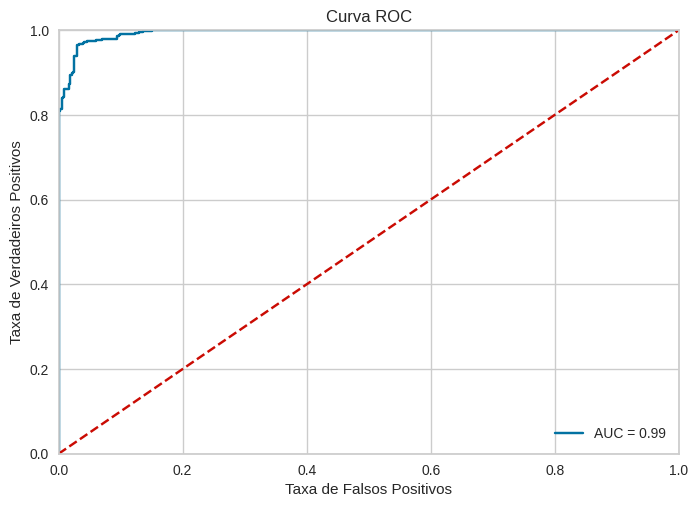

In [97]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm_model.predict_proba(X_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

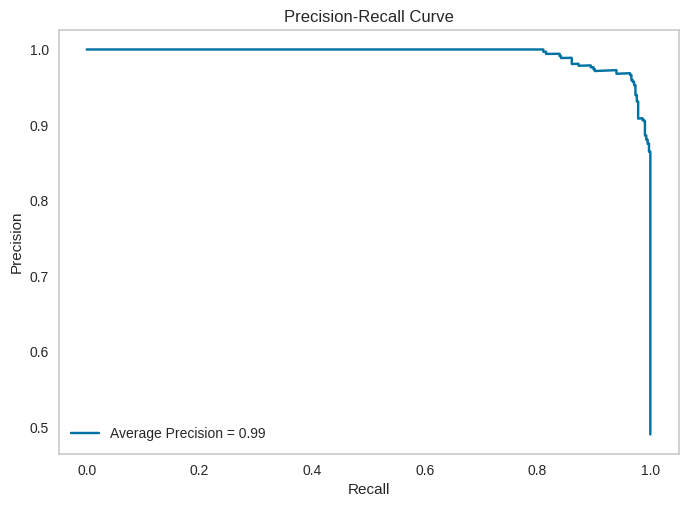

In [102]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = gbm_model.predict_proba(X_teste)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_teste, y_scores)
average_precision = average_precision_score(y_teste, y_scores)

plt.plot(recall, precision, label=f'Average Precision = {average_precision:.2f}', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

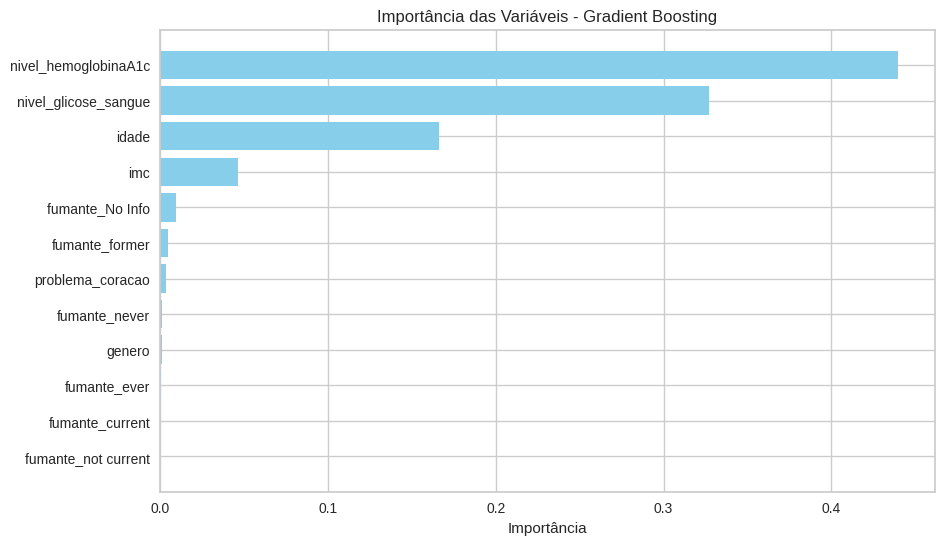

In [107]:
importances = gbm_model.feature_importances_
feature_names = [f'feature_{i}' for i in range(X_teste.shape[1])]  # ou use os nomes reais das colunas

# Organizando as importâncias em um DataFrame
feature_importances = pd.DataFrame({'feature': X_teste.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plotando as importâncias
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Gradient Boosting')
plt.gca().invert_yaxis()  # inverte para mostrar a variável mais importante no topo
plt.show()

Percebemos que o modelo está generalizando bem os dados, apresentando um desempenho muito bom nos dados de treino utilizados no Pycaret para gerar o melhor modelo inicial. Além disso, observamos uma melhora nos resultados com os novos dados utilizados para a validação do modelo. Todas as métricas de avaliação estão apresentando valores significativos.

## Considerações finais sobre o modelo

Nesta análise, desenvolvemos um modelo de machine learning para prever o risco de diabetes com base em dados clínicos. Os resultados demonstraram que o modelo GradienteBoostingMachine (GBM) apresentou a melhor performance, alcançando uma PRECISÃO de 96% nas previsões, com uma ACURACIA de 96% e um RECALL de 96%.

Esses resultados ressaltam a importância de fatores como idade, índice de massa corporal (IMC) e níveis de glicose na determinação do risco de desenvolvimento de diabetes.

A interpretação dos resultados indica que a identificação precoce dos indivíduos em risco é fundamental para intervenções preventivas. A utilização desse modelo pode ajudar profissionais de saúde a personalizar estratégias de tratamento e promoção de saúde, abordando não apenas os fatores de risco, mas também implementando programas de educação e conscientização.

Entretanto, é importante reconhecer as limitações do estudo. O modelo foi treinado em um conjunto de dados que pode não refletir todas as populações e contextos, o que pode afetar sua generalização. Além disso, variáveis não consideradas, como hábitos de vida e fatores socioeconômicos, podem influenciar o risco de diabetes e devem ser exploradas para um estudo real.

Em suma, o modelo desenvolvido não apenas contribui para a compreensão dos determinantes do diabetes, mas também oferece uma ferramenta prática para a identificação de indivíduos em risco. A implementação de tal modelo em ambientes clínicos pode potencialmente reduzir a incidência de diabetes e melhorar a qualidade de vida dos pacientes, sublinhando a importância da análise de dados na saúde pública.